In [81]:
import numpy as np
import pointCollection as pc
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The simplest way to create a data object is from a dictionary, using the from_dict() method:

<class 'pointCollection.data.data'> with shape (10,),
with fields:
['x', 'y', 'z']


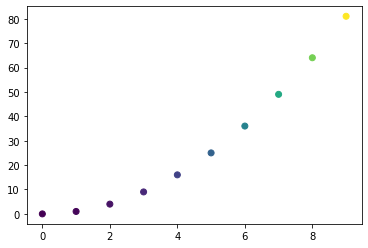

In [73]:
x=np.arange(10)
y=x**2
z=y
D = pc.data().from_dict({'x':x,'y':y,'z':z})
print(D)
plt.figure(1); plt.scatter(D.x, D.y, c=D.z)

It is also possible to create a data object from a list of other data objects using the from_list() method. The resulting object will have all of the fields from all of the items in the list, with missing fields filled in with NaNs

<class 'pointCollection.data.data'> with shape (20,),
with fields:
['t', 'z', 'x', 'y']
D2.t is:
[nan nan nan nan nan nan nan nan nan nan -2. -1.  0.  1.  2.  3.  4.  5.
  6.  7.]


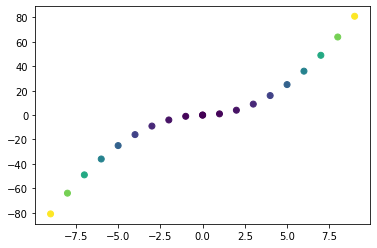

In [74]:
D1 = pc.data().from_dict({'x':-x,'y':-y,'z':z,'t':x-2})
D2 = pc.data().from_list([D, D1])
print(D2)
print("D2.t is:")
print(D2.t)
plt.figure(2); plt.scatter(D2.x, D2.y, c=D2.z)

Data structures can also be sliced using bracket notation, which is an alternative for the copy_subset() method.  If the data() structure has the columns keyword set, then a 1-d slice index will return a data structure with dimensions n x N_cols, otherwise it will be 1-D.

<class 'pointCollection.data.data'> with shape (8,),
with fields:
['t', 'z', 'x', 'y']


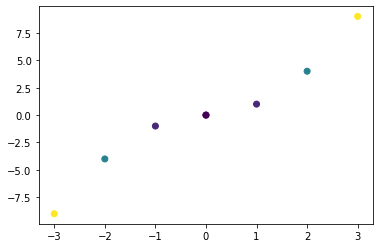

In [75]:
D3=D2[np.abs(D2.x)< 4]
print(D3)
plt.figure(3); plt.scatter(D3.x, D3.y, c=D3.z)

_data_ objects can be written to hdf5 files with the to_h5() method, and the destination group is specified with the group keyword.  Reading from a file uses the from_h5() method.

In [76]:
D2.to_h5('data_test.h5', replace=True, group='dummy')
D4=pc.data().from_h5('data_test.h5', group='dummy')
print("wrote data:")
print(D2)
print("read data:")
print(D4)

wrote data:
<class 'pointCollection.data.data'> with shape (20,),
with fields:
['t', 'z', 'x', 'y']
read data:
<class 'pointCollection.data.data'> with shape (20,),
with fields:
['t', 'x', 'y', 'z']


Data types other than the basic _data_ class are added by introducing subclasses into the pointCollection module.  One example is the ATL06 data type:

In [77]:
ATL06_file=os.path.dirname(pc.__file__)+'/test_data/ATL06_20190205041106_05910210_209_01.h5'
D_06=pc.ATL06.data().from_h5(ATL06_file)
print(D_06)

_data_ objects have a get_xy() method that creates x and y fields based on latitude and longitude fields.  It takes an argument specifying the coordinate system, which can either be a proj4 string (as a keyword or non-keyword argument) or an EPSG number (as a keyword)

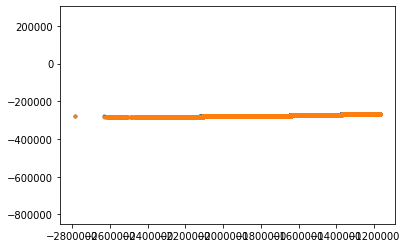

In [80]:
D_06.get_xy(EPSG=3031)
# equivalent to D_06.get_xy(+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
plt.figure()
plt.plot(D_06.x, D_06.y, '.'); plt.xlabel('x'); plt.ylabel('y')
plt.axis('equal');